### Regression

What function we use to estimate a relationship between $y$ and the regressor(s) depends on the data that we have.  As practice using multiple x-variables, let's simulate a dataset that is generated by the following equation
$$
y = 4 + 0.5 x + 3 x^2 + u
$$

The relationship between $y$ and $x$ in the above equation is said to be *nonlinear* in $x$.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

np.random.seed(0)

df = pd.DataFrame(columns=['y', 'x', 'x2'])
df['x'] = np.random.normal(0, 1, 100)
df['x2'] = df['x'] ** 2
df['y'] = 4 + 0.5 * df['x'] + 3 * df['x2'] + np.random.normal(0, 0.5, 100)
df.head()

,y,x,x2
0,15.159244,1.764052,3.111881
1,4.006576,0.400157,0.160126
2,6.727911,0.978738,0.957928
3,20.669952,2.240893,5.021602
4,14.810536,1.867558,3.487773


Note that to square column `'x'` to produce `'x2'`, all we need to do is type `df2['x'] ** 2` since `**` is the command for exponentiation.

Next, plot a relationship between just `y` and `x`, assuming a linear fit.

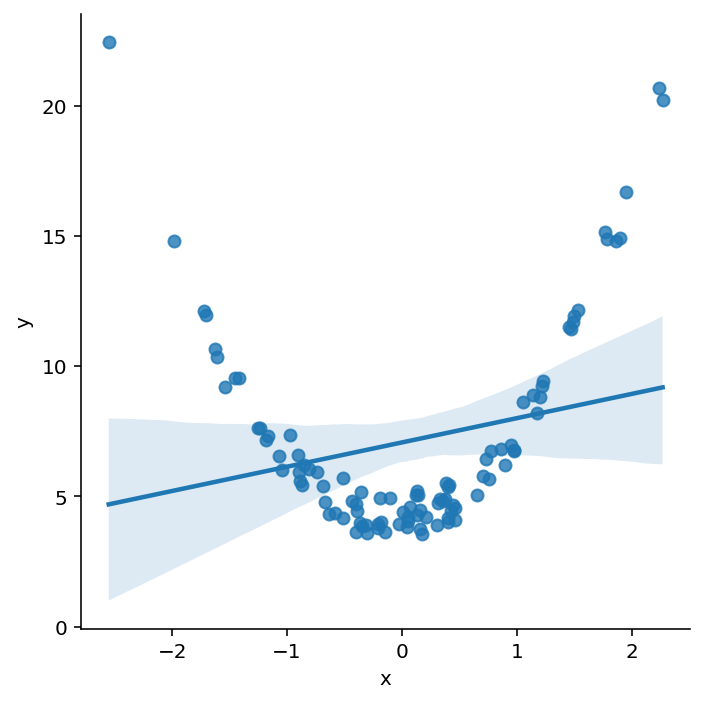

In [2]:
sns.lmplot(x='x', y='y', data=df)

The estimated straight line gets things horribly wrong!  The line is pretty far away from a lot of the actual data points.

The scatter plot of the data above makes clear that the data demonstrates a non-linear relationship.

What we ought do to is fit a line given by
$$
\hat{y} = c + \hat{\beta}_1 x + \hat{\beta}_2 x^2
$$

where there are two beta coefficients.  One for $x$, and one for $x^2$.

In [4]:
model = smf.ols('y ~ x + x2', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2885.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           3.91e-87
Time:                        19:42:50   Log-Likelihood:                -75.005
No. Observations:                 100   AIC:                             156.0
Df Residuals:                      97   BIC:                             163.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0714      0.066     61.584      0.0

The variable `model2` stores a lot of data.  Beyond holding summary output for the performance of the regression (which we've accessed via the `model2.summary()` command), we can reference the estimated parameters directly via `.params`.  For example:

In [5]:
print('Intercept: ', model.params['Intercept'])
print('beta for x:', model.params['x'])
print('beta for x2:', model.params['x2'])

Intercept:  4.07135075409863
beta for x: 0.5615154693913419
beta for x2: 2.966624223933464


As an aside, the fact that we're using square brackets to reference items inside of `squared.params` is a clue that the `.params` component of the variable `squared` was built using a dictionary-like structure.

One way to tell that the estimates of `squared` are better than the estimates of `straight` is to look at the `R-squared` value in the summary output.  This measure takes a value between 0 and 1, with a score of 1 indicating perfect fit.  For comparison purposes, consider the linear fit model below:

In [6]:
model_linear = smf.ols('y ~ x', data=df).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.767
Date:                Sun, 26 Sep 2021   Prob (F-statistic):             0.0182
Time:                        19:45:33   Log-Likelihood:                -277.26
No. Observations:                 100   AIC:                             558.5
Df Residuals:                      98   BIC:                             563.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0734      0.392     18.054      0.0

The linear-fit model produced an R-squared of 0.056 while the quadratic-fit model yielded a R-squared of 0.983.

Another informative way to jude a modeled relationship is by plotting the **residuals**.  The residuals are the "un-expected" part of the equation.  For example, in the linear-fit model, the residual is defined as
$$
\hat{u} := y - \hat{y} = y - \hat{c} - \hat{\beta} x
$$
and in the quadratic-fit model the residual, $\hat{u}$, is given by
$$
\hat{u} := y - \hat{y} = y- \hat{c} - \hat{\beta}_1 x - \hat{\beta}_2 x^2
$$
Using the information in `.params`, we can calculate residuals.

In [7]:
df['resid'] = model.resid
df['resid_linear'] = model_linear.resid

Next, plot the two sets of residuals.

<AxesSubplot:xlabel='x', ylabel='resid_linear'>

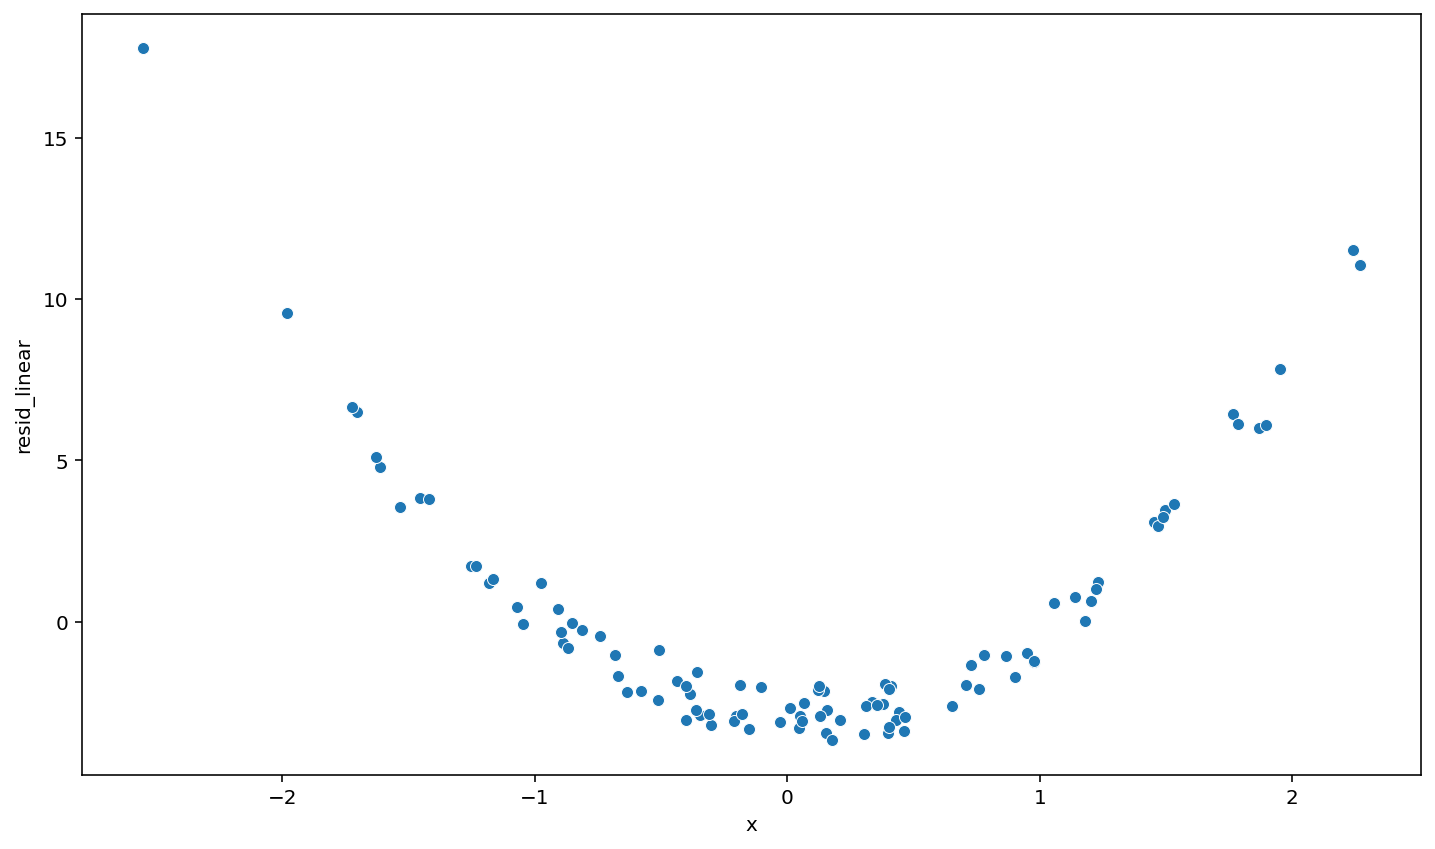

In [8]:
sns.scatterplot(x='x', y='resid_linear', data=df)

In the straight-line model, we can see that the errors have a noticeable pattern to them.  This is an indication that a more complicated function of $x$ would be a better description for the relationship between $x$ and $y$.

<AxesSubplot:xlabel='x', ylabel='resid'>

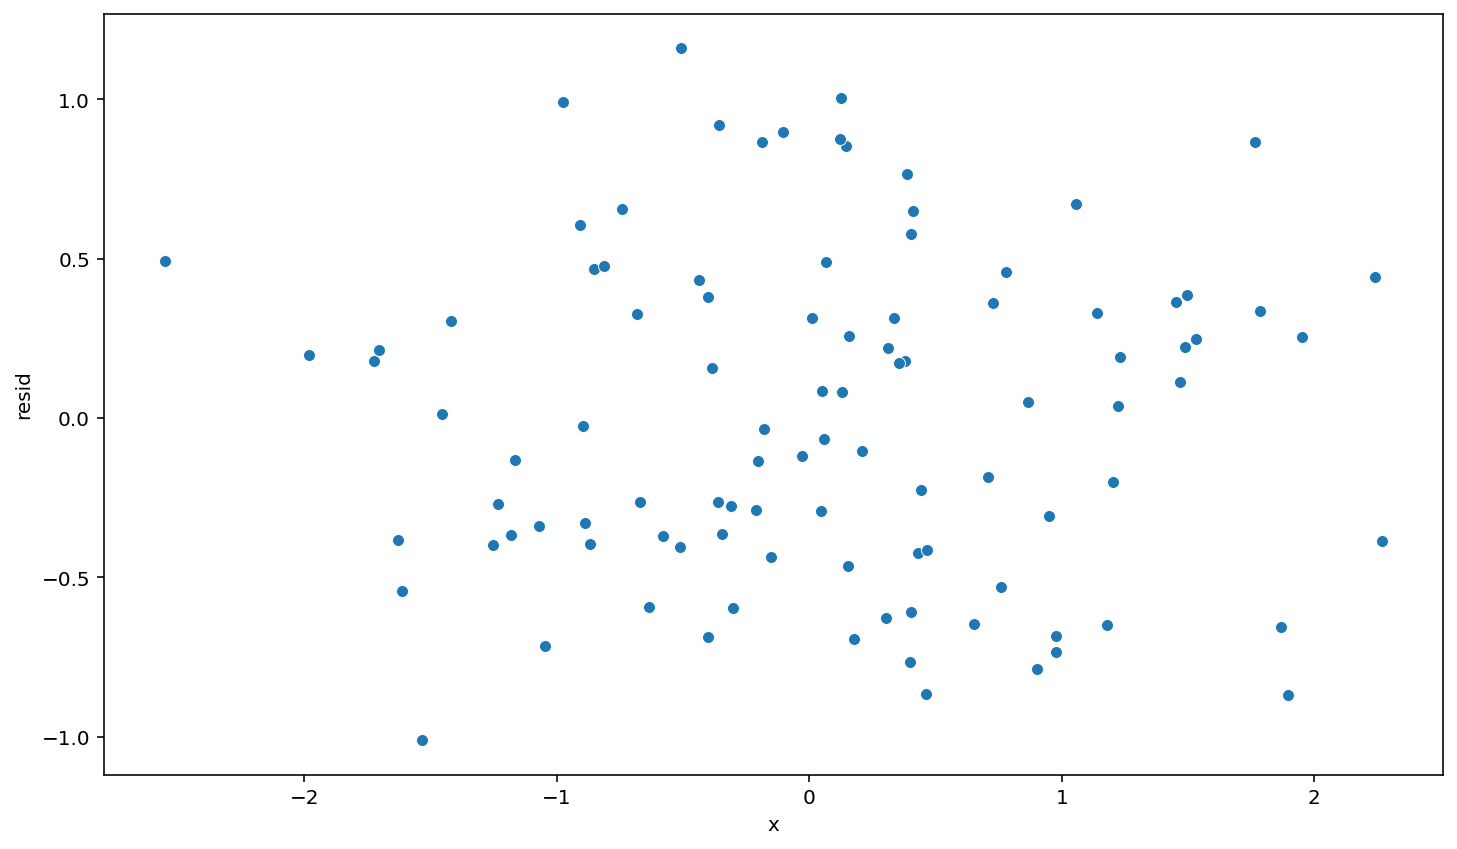

In [9]:
sns.scatterplot(x='x', y='resid', data=df)

In comparison, the residuals from the squared model look more random.  Additionally, they're substantially smaller on average, with almost all residuals having an absolute value less than one.  This indicates a much better fit than the straight-line model in which the residual values were often much larger.

### Looking Beyond OLS

OLS works well when the $y$ variable in our model is a linear combination of $x$ variables.  Note that the relationship between $y$ and a given regressor may be nonlinear, as in the case of $y$ being a function of $x$ and $x^2$.  However, while we may say that $y$ is a nonlinear function of $x$ in this case, the variable $y$ is still a linear function of $x$ and $x^2$.  To clarify:
$$
y = \alpha + \beta x + u
$$
is linear in $x$.  Likewise:
$$
y = \alpha + \beta_1 x + \beta_2 x^2 + u
$$
is linear in $x$ and $x^2$.  In contrast, the function
$$
y = \frac{e^{\alpha + \beta x + u}}{1 + e^{\alpha + \beta x + u}}
$$ is *nonlinear*.  This last equation may look terrifyingly unnatural, but it's actually very useful.  Let's get a sense of what the equation looks like by plotting the function
$$
y = \frac{e^{x}}{1 + e^{x}}.
$$

    x         y
0   2  0.880797
1   5  0.993307
2 -10  0.000045
3  -7  0.000911
4  -7  0.000911


<AxesSubplot:xlabel='x', ylabel='y'>

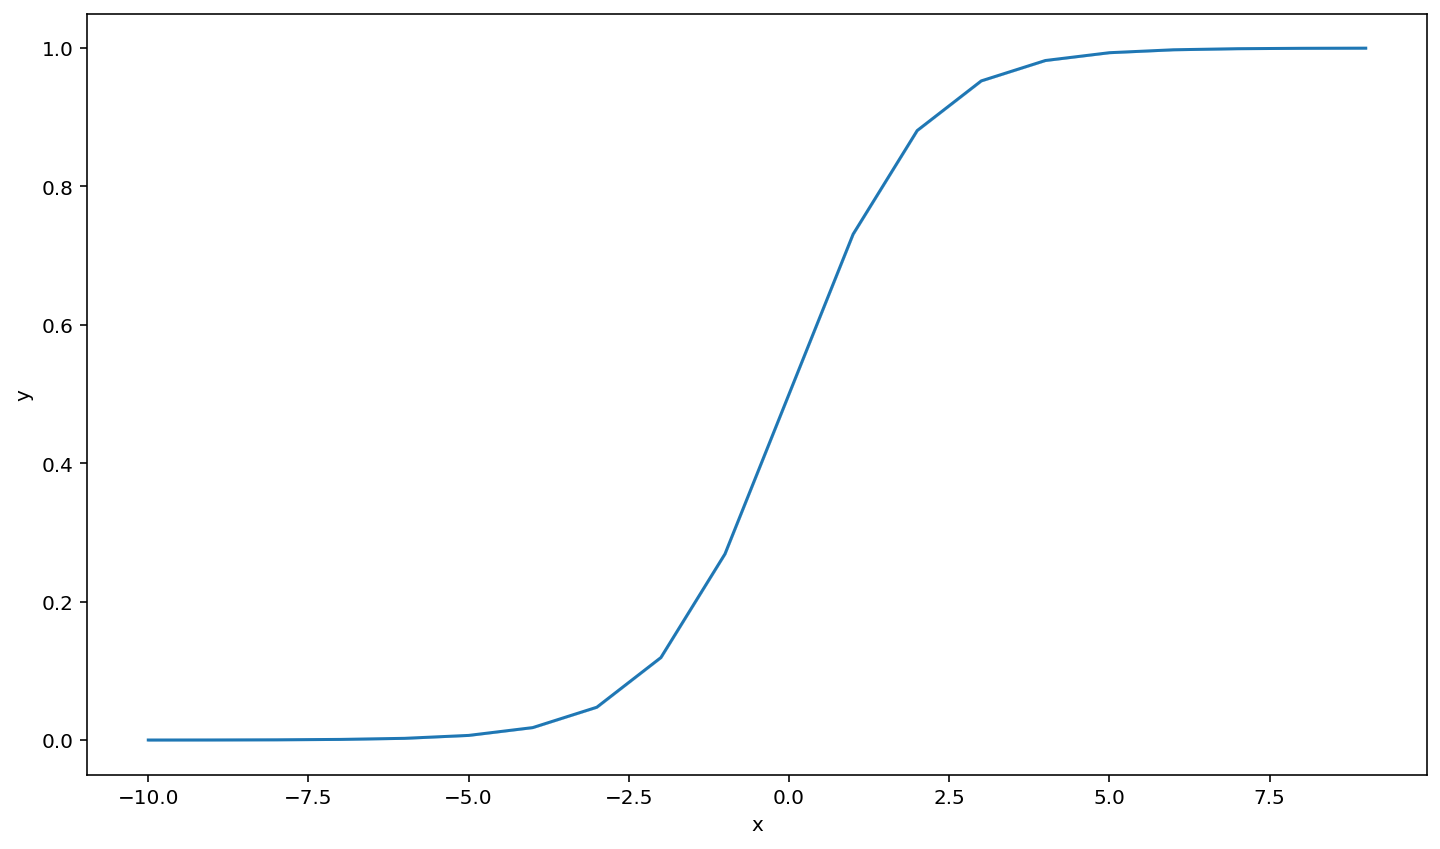

In [10]:
np.random.seed(0)
curve = pd.DataFrame(columns=['x','y'])
curve['x'] = np.random.randint(low=-10, high=10, size=100)
curve['y'] = np.exp(curve['x']) / (1 + np.exp(curve['x']))
print(curve.head())
sns.lineplot(x='x', y='y', data=curve)

The function $y = e^{x}/(1+e^{x})$ creates an S-curve with a lower bound of $0$ and an upper bound of $1$.

These bounds are useful in analytics.  Often, our task is to estimate probabilities.  For instance, what is the likelihood that a borrower defaults on their mortgage, the likelihood that a credit card transaction is fraudulent, or the likelihood that a company will violate its capital expenditure covenant on an outstanding loan?  All of these questions require us to estimate a probability.  The above function is useful because it considers a situation in which the $y$ variable is necessarily between $0$ and $1$ (i.e. $0\%$ probability and $100\%$ probability).

Suppose that we instead took the `curve` data above and tried to fit it with linear regression.

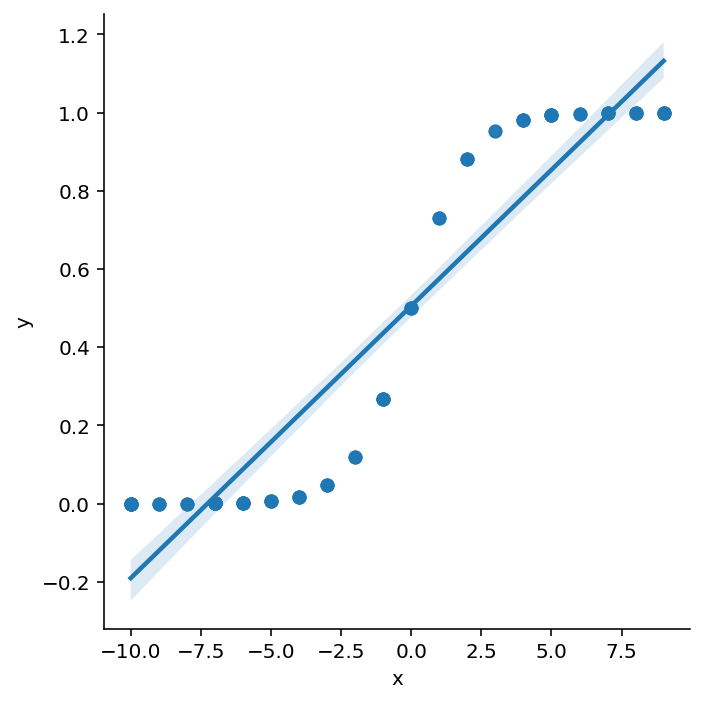

In [11]:
sns.lmplot(x='x', y='y', data=curve)

Note that in the above plot, there are estimated "probabilities" (the $\hat{y}$ values) that are either lower than $0$ or higher than $1$.  This is statistically impossible.

That fancy S-shaped function above is called the *inverse logit* function.  That is because $e^x / (1+e^x)$ is the inverse of the *logit* function given by $log(x / (1-x)$.  Just like we can invert the equation $y = f(x)$ to get $f^{-1}(y) = x$, the inverse of $y = e^x / (1+e^x)$ is given by $log(y / (1-y)) = x$.

When we model probabilities, the $y$ variable will be either $0$ or $1$ for any observations.  Observations where the event occurred are recorded with $y=1$.  For instance, in a dataset about mortgage default, those borrowers who default on their mortgage would have $y=1$ and everyone else would have $y=0$.

Suppose that we estimate a model given by
$$
log\Big(\frac{y}{1-y}\Big) = \alpha + \beta x + u
$$.
Then, the estimated value $\hat{\alpha} + \hat{\beta}x$ for a given observation would be $log(\hat{y}/(1-\hat{y}))$.  This is what we refer to as the *log odds ratio*.  The odds ratio is the probability that $y$ equals $1$ divided by the probability that $y$ equals $0$; this is what $\hat{y}/(1-\hat{y})$ tells us.  Ultimately, our estimate for $\hat{y}$ then tells us the likelihood that the true value for $y$ is equal to $1$.

This type of model is called a logistic regression model.  Let's simulate some data.

In [12]:
np.random.seed(0)
df2 = pd.DataFrame(columns=['x', 'y'])
df2['x'] = np.random.normal(2, 1, 1000)
df2['xb'] = -9 + 4 * df2['x']
df2['y'] = np.random.binomial(n=1, p= np.exp(df2['xb']) / (1+np.exp(df2['xb'])) )
df2.head()

,x,y,xb
0,3.764052,1,6.056209
1,2.400157,0,0.600629
2,2.978738,1,2.914952
3,4.240893,1,7.963573
4,3.867558,1,6.470232


Now try fitting a model using linear regression (ordinary least squares).  When OLS is applied to a $y$ variable that only takes value 0 or 1, the model is referred to as a linear probability model (LPM).

In [13]:
lpm = smf.ols('y ~ x', data=df2).fit()
print(lpm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1056.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):          1.41e-158
Time:                        19:59:38   Log-Likelihood:                -346.17
No. Observations:                1000   AIC:                             696.3
Df Residuals:                     998   BIC:                             706.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2928      0.024    -12.187      0.0

Now fit the model using logistic regression.

In [14]:
logit = smf.logit('y ~ x', data=df2).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.292801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:                  0.5660
Time:                        20:00:42   Log-Likelihood:                -292.80
converged:                       True   LL-Null:                       -674.60
Covariance Type:            nonrobust   LLR p-value:                4.432e-168
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5975      0.567    -15.154      0.000      -9.709      -7.486
x              3.8987      0.

The estimated parameters (intercept and $\beta$ coefficient) are much closer to their true value using logistic regression.  While popular, linear probability models *do not* often give meaningful estimates.  This is especially true when outcomes are rare (meaning most $y$ values are either 0 or 1, and there is not a relatively even balance between the two).